**IMPORTS**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import os
from CreateCsv import get_df
from CreateCsv import getpartialcsv
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

import talib
from talib import SMA
from talib import T3
from talib import WMA
from talib.abstract import *


**GETTING CSV**

**MOVING AVERAGE**

*SMA* = Simple Moving Average. calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.

*T3* = Triple Exponential Moving Average.  takes multiple exponential moving averages (EMA) of the original EMA and subtracting out some of the lag.

*WMA* = Weighted Moving Average. The weighted moving average is calculated by multiplying each observation in the data set by a predetermined weighting factor

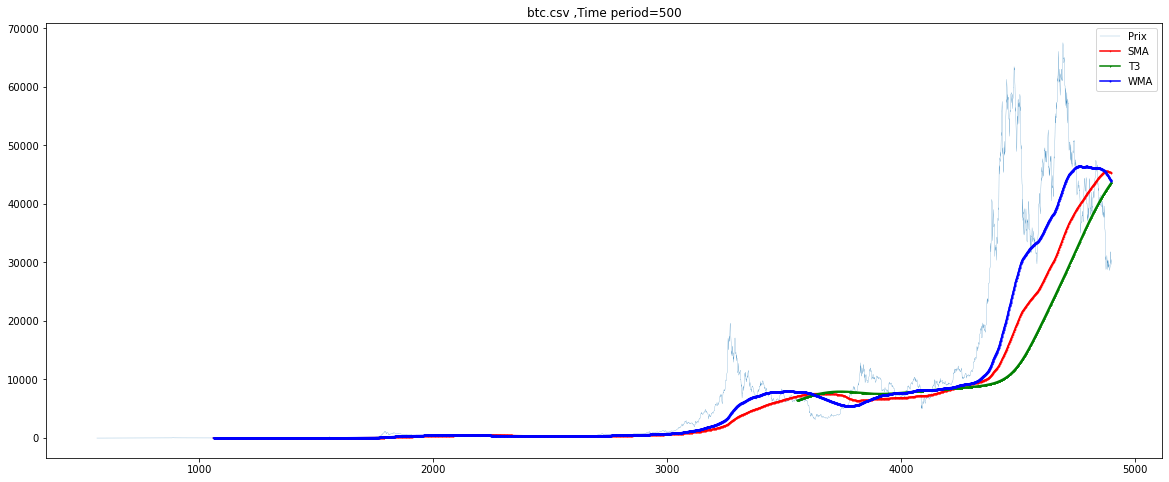

In [2]:
def get_graphe(csv,TA1,TA2,TA3,timep):
    df=get_df(csv)
    
    priceusd=df['PriceUSD']
    if(TA1=='SMA'):
        df[TA1] = SMA(priceusd,timep) 
        color1='red'
    if(TA2=='T3'):
        df[TA2] = T3(priceusd,timep)
        color2='green'
    if(TA3=='WMA'):
        df[TA3] = WMA(priceusd,timep) 
        color3='blue'
    fig, ax = plt.subplots(figsize = (20, 8))
    
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df[TA1],marker='.',markersize=1,color=color1, label=TA1)
    ax.plot(df[TA2],marker='+',markersize=1,color=color2, label=TA2)
    ax.plot(df[TA3],marker='o',markersize=1,color=color3, label=TA3)
    
    ax.legend();
    plt.title(csv+" ,Time period="+str(timep))

get_graphe('btc.csv','SMA','T3','WMA',500)


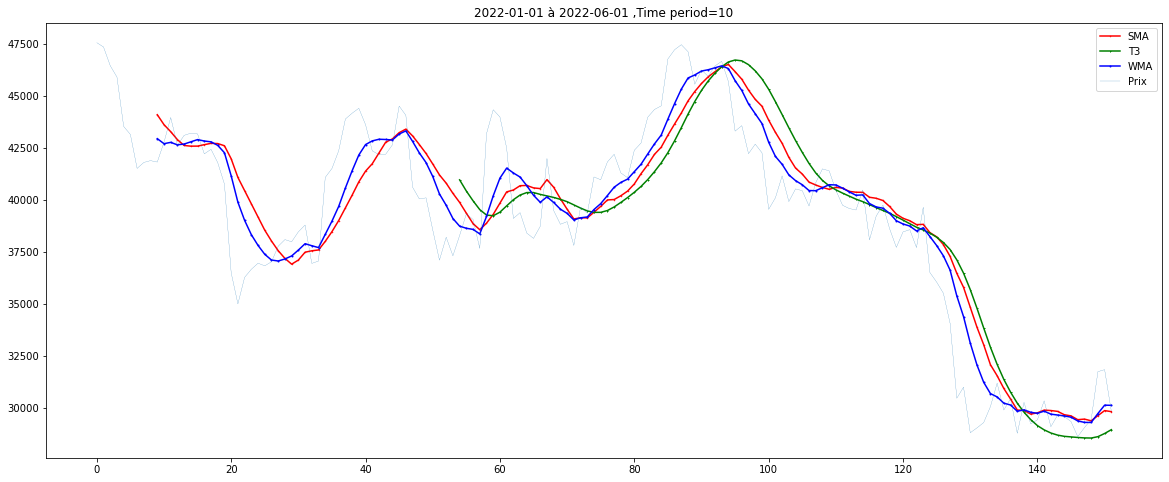

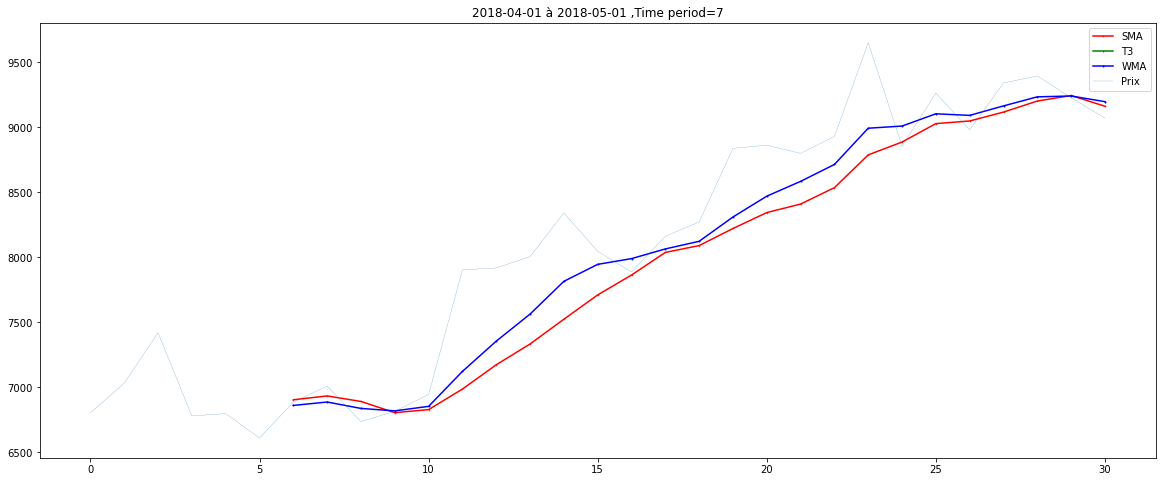

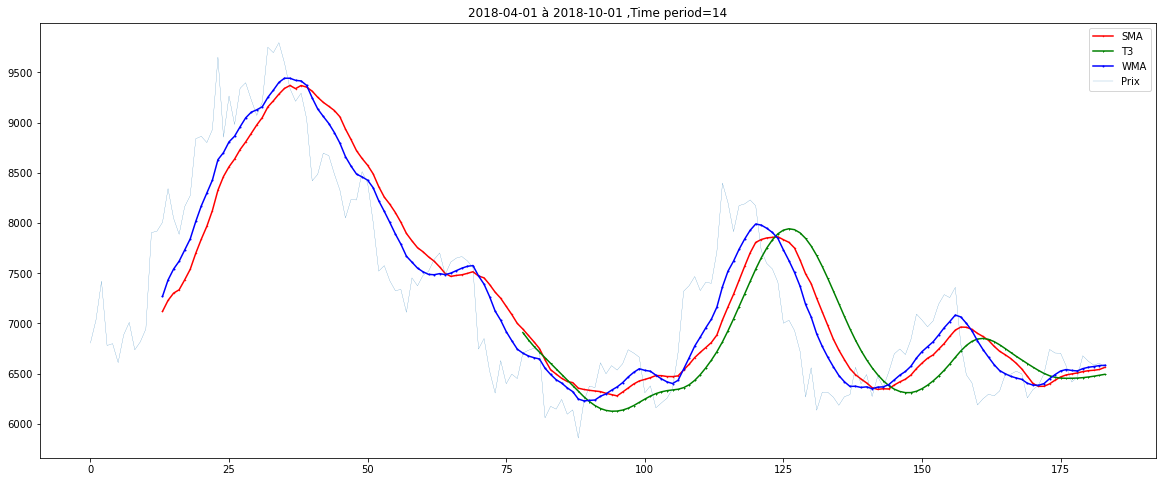

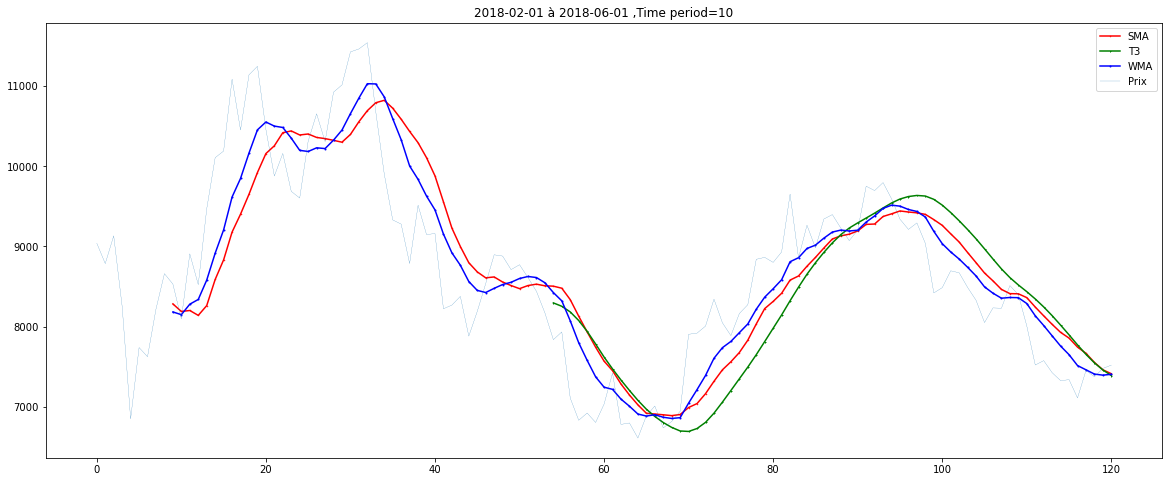

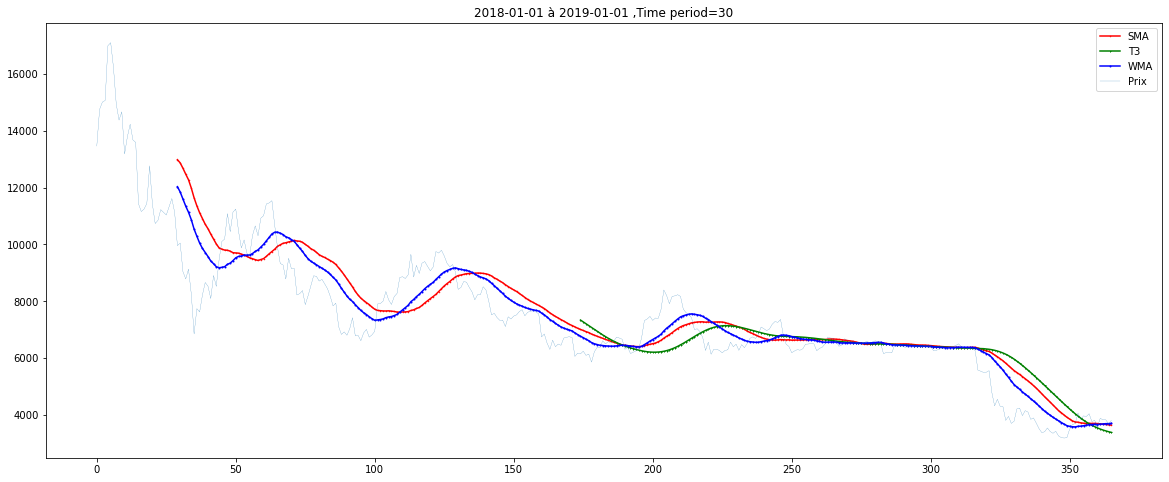

In [5]:
def get_graphe_comp(timep,date1,date2):
    df=getpartialcsv(date1,date2)
    priceusd=df['PriceUSD']
    df['SMA'] = SMA(priceusd,timep)
    df['T3'] = T3(priceusd,timep)
    df['WMA'] = WMA(priceusd,timep)
    fig, ax = plt.subplots(figsize = (20, 8))
    ax.plot(df['SMA'],marker='.',markersize=1,color='red', label='SMA')
    ax.plot(df['T3'],marker='+',markersize=1,color='green', label='T3')
    ax.plot(df['WMA'],marker='o',markersize=1,color='blue', label='WMA')
    ax1=ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')   
    ax.legend();
    plt.title(date1+ " à "+ date2+" ,Time period="+str(timep))

get_graphe_comp(10,"2022-01-01","2022-06-01")
get_graphe_comp(7,"2018-04-01","2018-05-01")
get_graphe_comp(14,"2018-04-01","2018-10-01")
get_graphe_comp(10,"2018-02-01","2018-06-01")
get_graphe_comp(30,"2018-01-01","2019-01-01")



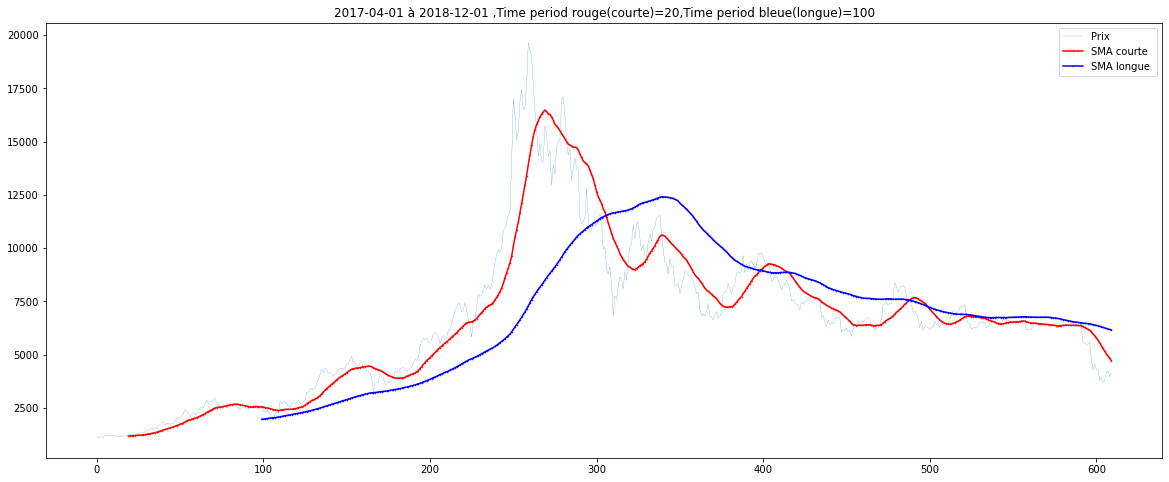

In [26]:
def get_graphe_SMA(timep1,timep2,date1,date2):
    df=getpartialcsv(date1,date2)
    priceusd=df['PriceUSD']
    df['SMA'] = SMA(priceusd,timep1)
    df['SMA1']=SMA(priceusd,timep2)
    fig, ax = plt.subplots(figsize = (20, 8))
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df['SMA'],marker='.',markersize=1,color='red', label='SMA courte')
    ax.plot(df['SMA1'],marker='.',markersize=1,color='blue', label='SMA longue ') 
    ax.legend();
    plt.title(date1+ " à "+ date2+" ,Time period rouge(courte)="+str(timep1)+ ",Time period bleue(longue)="+str(timep2))

get_graphe_SMA(20,100,"2017-04-01","2018-12-01")



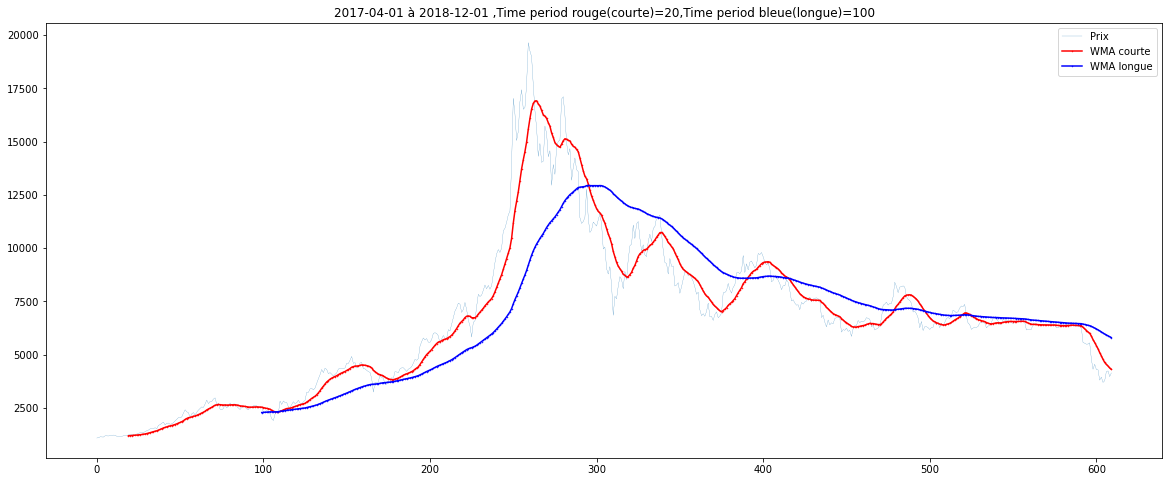

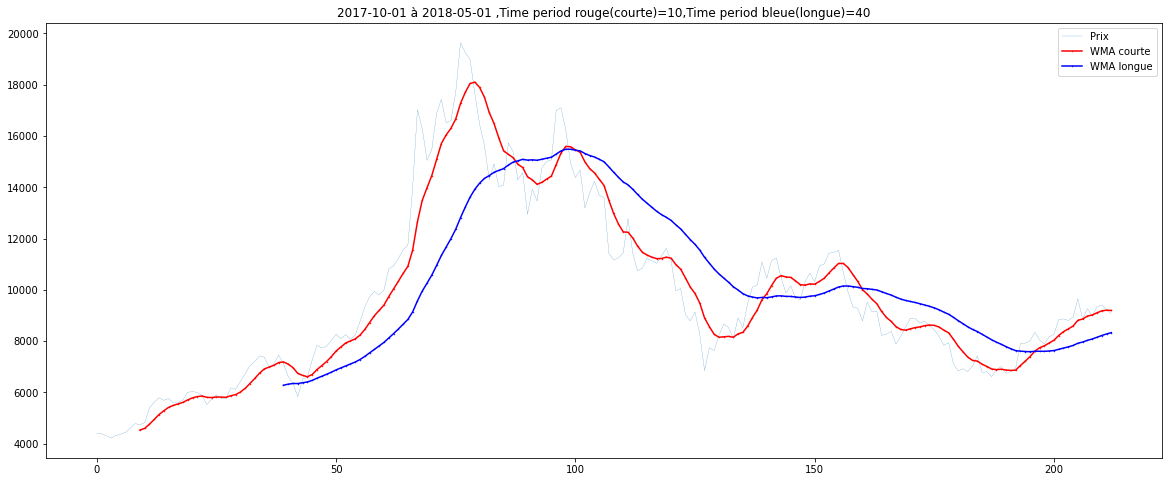

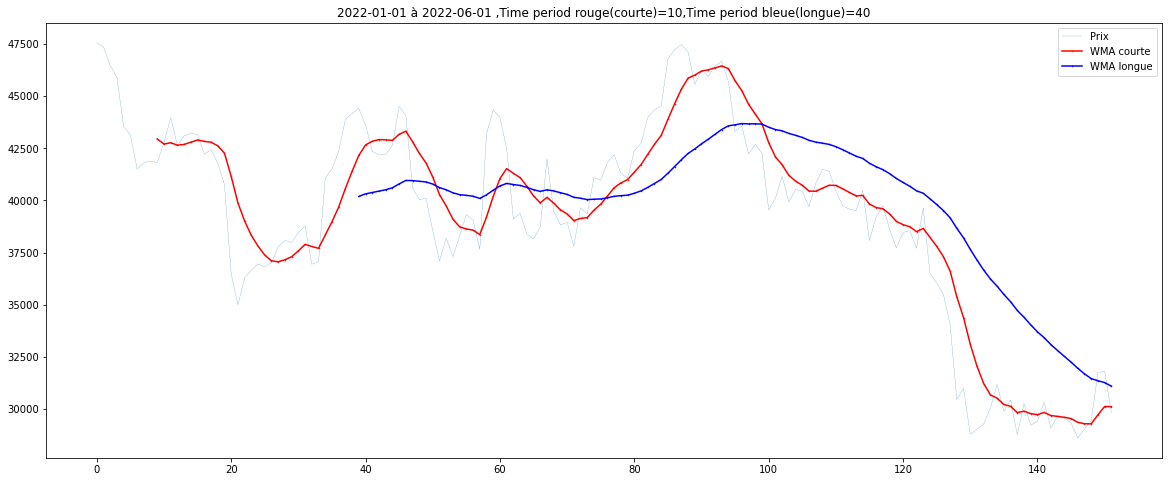

In [8]:
def get_graphe_WMA(timep1,timep2,date1,date2):
    df=getpartialcsv(date1,date2)
    priceusd=df['PriceUSD']
    df['WMA'] = WMA(priceusd,timep1)
    df['WMA1']=WMA(priceusd,timep2)
    fig, ax = plt.subplots(figsize = (20, 8))
    
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df['WMA'],marker='.',markersize=1,color='red', label='WMA courte')
    ax.plot(df['WMA1'],marker='.',markersize=1,color='blue', label='WMA longue') 
    
    ax.legend();
    plt.title(date1+ " à "+ date2+" ,Time period rouge(courte)="+str(timep1)+ ",Time period bleue(longue)="+str(timep2))

get_graphe_WMA(20,100,"2017-04-01","2018-12-01")
get_graphe_WMA(10,40,"2017-10-01","2018-05-01")
get_graphe_WMA(10,40,"2022-01-01","2022-06-01")


C:\Users\noorm\AppData\Local\Temp/ipykernel_1724/524302170.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax,xticklabels=df['time'])


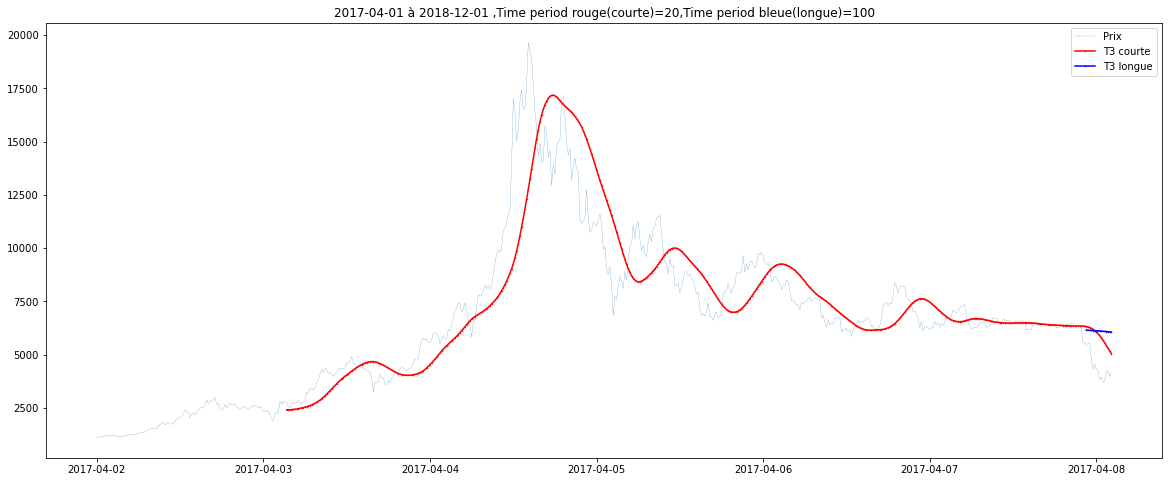

In [101]:
def get_graphe_T3(timep1,timep2,date1,date2):
    df=getpartialcsv(date1,date2)
    priceusd=df['PriceUSD']
    df['T3'] = T3(priceusd,timep1)
    df['T31']=T3(priceusd,timep2)
    fig, ax = plt.subplots(figsize = (20, 8))
    ax.plot(priceusd, linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df['T3'],marker='.',markersize=1,color='red', label='T3 courte')
    ax.plot(df['T31'],marker='.',markersize=1,color='blue', label='T3 longue')    
    ax.legend();
    plt.title(date1+ " à "+ date2+" ,Time period rouge(courte)="+str(timep1)+ ",Time period bleue(longue)="+str(timep2))

get_graphe_T3(20,100,"2017-04-01","2018-12-01")


C:\Users\noorm\AppData\Local\Temp/ipykernel_1724/4150119199.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax,xticklabels=df['time'])


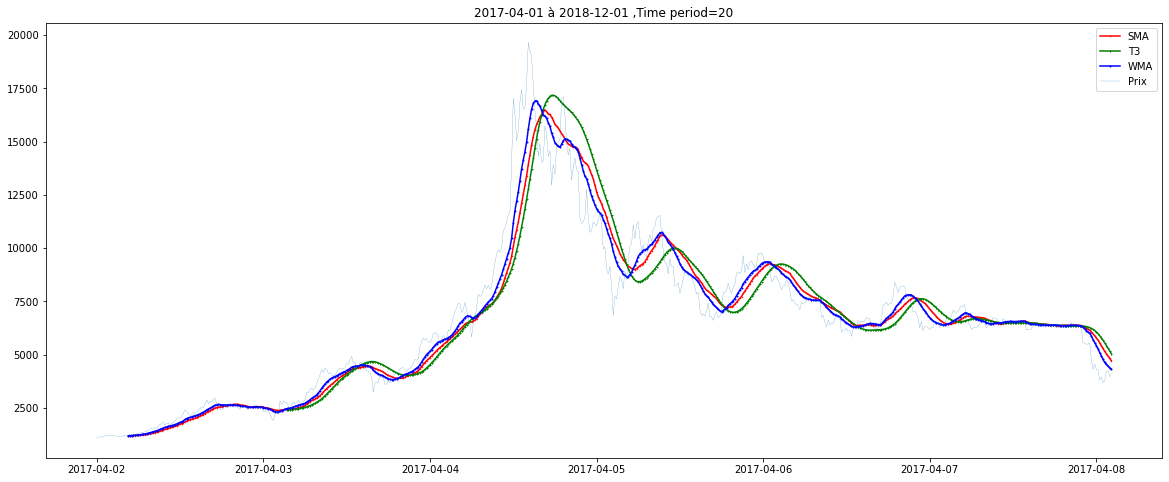

In [93]:
get_graphe_comp(20,"2017-04-01","2018-12-01")

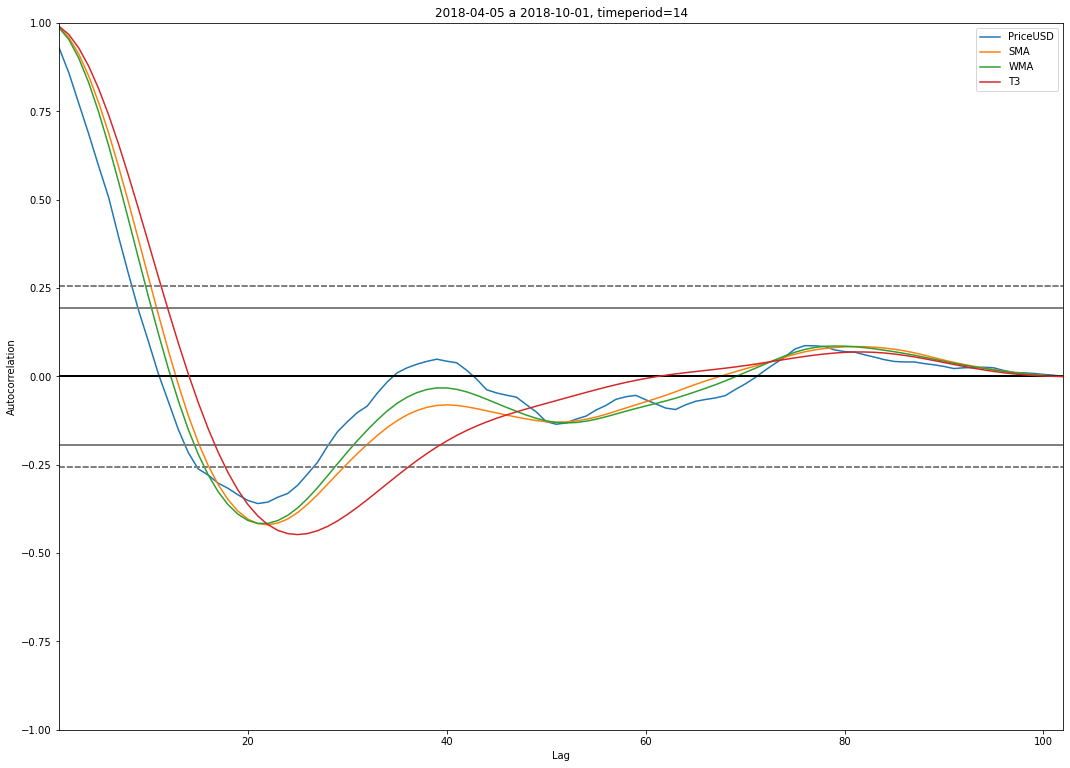

In [6]:
from pandas.plotting import autocorrelation_plot
def getautoPlot(date1,date2,timep):
    plt.figure(figsize=(18, 13))
    plt.title(date1+" a "+ date2+", timeperiod="+ str(timep))
    df=getpartialcsv('btc.csv',date1,date2)
    priceusd=df['PriceUSD']
    df['SMA'] = SMA(priceusd,timep)
    df['WMA']=WMA(priceusd,timep)
    df['T3'] = T3(priceusd,timep)
    df=df.dropna()
    df = df.reset_index(drop=True)
    smausd=df['SMA']
    list=['PriceUSD','SMA','WMA','T3']
    for variable in list:
        x=autocorrelation_plot(df[variable], label = variable)
        
        
getautoPlot('2018-04-05','2018-10-01',14)

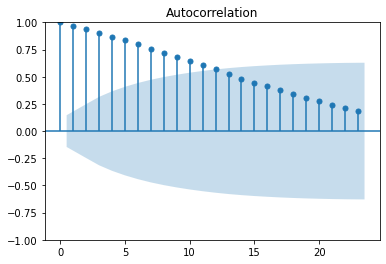

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv('PartialCSV.csv', header=0, index_col=0)
plot_acf(series)
plt.show()